In [2]:
#读入训练集数据
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
train=pd.read_csv('train.csv')
train=train.copy()

#检查缺失值
miss_n=train.isnull().sum()
print(miss_n)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
exceeds50K        0
dtype: int64


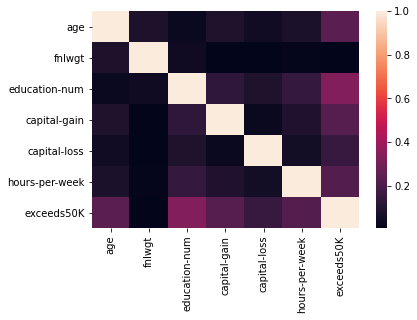

In [3]:
#绘出各个特征之间相关系数
import seaborn as sns
corrmat=train.corr().abs()
sns.heatmap(corrmat)
plt.show()


<AxesSubplot:>

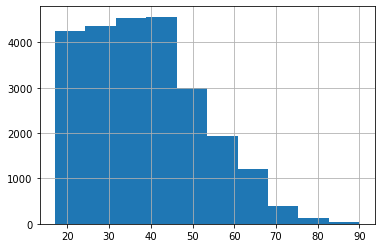

In [4]:
#由上图可知，不存在高共线性的特征。接下来我们深入各特征的商业内涵。首先是‘age’
train['age'].hist()


In [6]:
#我们可以看到，相比较70岁以上的老人占总样本额的比例相当少
for i in train:
    print(i)
    print(train[i].unique())

age
[30 60 52 37 63 23 47 48 24 25 59 22 33 65 40 38 27 17 55 56 35 42 34 57
 18 28 44 39 19 54 32 21 41 45 49 50 36 29 31 58 20 26 70 53 43 75 64 68
 46 72 74 51 67 76 61 66 62 71 73 87 80 77 90 81 69 79 78 82 83 84 88 85
 89 86]
workclass
[' ?' ' Private' ' State-gov' ' Self-emp-inc' ' Self-emp-not-inc'
 ' Local-gov' ' Federal-gov' ' Without-pay' ' Never-worked']
fnlwgt
[147215 173960 105428 ... 112959 228608 140711]
education
[' Some-college' ' Bachelors' ' Assoc-voc' ' HS-grad' ' Assoc-acdm'
 ' Masters' ' 12th' ' Doctorate' ' 10th' ' 9th' ' Prof-school' ' 5th-6th'
 ' 11th' ' 7th-8th' ' 1st-4th' ' Preschool']
education-num
[10 13 11  9 12 14  8 16  6  5 15  3  7  4  2  1]
marital-status
[' Never-married' ' Divorced' ' Married-civ-spouse' ' Widowed'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']
occupation
[' ?' ' Prof-specialty' ' Sales' ' Protective-serv' ' Craft-repair'
 ' Farming-fishing' ' Exec-managerial' ' Other-service' ' Adm-clerical'
 ' Transport-moving' ' Mac

In [13]:
#在workclass，occupation，native-country中存在'?'值，我们需要讲这项数据统计出来
for i in ["workclass","occupation","native-country"]:
    print(i)
    print(train.loc[:,i].value_counts())

workclass
 Private             16863
 Self-emp-not-inc     1958
 Local-gov            1607
 ?                    1392
 State-gov            1002
 Self-emp-inc          848
 Federal-gov           735
 Without-pay             9
 Never-worked            7
Name: workclass, dtype: int64
occupation
 Prof-specialty       3138
 Craft-repair         3056
 Exec-managerial      3006
 Adm-clerical         2805
 Sales                2776
 Other-service        2435
 Machine-op-inspct    1498
 ?                    1399
 Transport-moving     1153
 Handlers-cleaners    1034
 Farming-fishing       749
 Tech-support          733
 Protective-serv       504
 Priv-house-serv       127
 Armed-Forces            8
Name: occupation, dtype: int64
native-country
 United-States                 21883
 Mexico                          482
 ?                               410
 Philippines                     146
 Germany                         108
 Puerto-Rico                      89
 El-Salvador                     

In [15]:
#有一定数量的？的缺失值，需要我们进行后期的量化
#education 和education_num的意义不是很明显，我们要探究他们两个的内在联系
def test_education(train_data):
    education_dict = {}
    different_list = []
    for row in train_data.itertuples():
        education = getattr(row, 'education')
        #由于输入的符号带有 - 因此输出按照列数输出
        education_num = getattr(row, '_5')
        if education not in education_dict:
            education_dict[education] = education_num
        else:
            if education_dict[education] != education_num:
                different_list.append([education, education_num])
    print(different_list)
test_education(train)


[]


In [16]:
#证明这两行的元素是一一对应的因此我们可以直接删除education部分
#接下来我们检查 train 和 test中各列元素是否一一对应，方便我们量化
test=pd.read_csv('test.csv')
test=test.copy()
#我们先测试test中的元素和train中的元素是否一一对应
for i in test:
    print(i)
    list =[]
    for y in test[i].unique():
        if(train[i]==y).any():
            continue
        else:
            list.append(y)
    print(list)

age
[]
workclass
[]
fnlwgt
[165017, 89347, 166398, 534775, 264526, 72744, 197057, 281403, 143208, 133436, 162908, 44712, 188409, 133449, 343333, 403625, 165106, 364913, 216931, 188928, 25864, 188328, 178309, 297266, 215384, 806552, 307589, 155124, 177635, 194970, 103315, 188136, 69510, 45363, 32519, 214923, 370615, 296849, 226374, 77336, 382272, 179644, 190885, 245465, 32146, 65372, 97698, 115487, 293485, 28357, 266983, 102412, 301654, 174216, 184435, 217517, 266037, 162322, 456399, 182437, 164427, 122033, 71457, 204389, 63685, 184046, 159737, 291665, 134232, 264722, 177783, 315303, 167963, 214014, 148953, 408498, 155737, 226918, 196373, 171914, 138667, 291429, 97159, 133536, 26911, 72486, 184081, 165315, 324311, 174353, 293073, 172560, 44364, 168381, 186299, 45317, 154556, 54560, 244419, 138332, 269687, 193231, 271262, 309055, 190385, 404868, 38189, 179813, 213977, 295737, 194717, 281751, 105189, 198692, 137951, 123816, 37894, 346382, 301431, 423883, 208049, 76281, 92969, 94754, 75993

[' Holand-Netherlands']


In [17]:
#除了 Holand-Netherlands in native-country,没有文字不同的选项，
#因此我们选择将native-country 中的 Holand-Netherlands和 ？ 采取同样的量化方式
#接下来测试train中的元素和test中的元素是否一一对应
for i in train:
    print(i)
    list =[]
    for y in train[i].unique():
        if(test[i]==y).any():
            continue
        else:
            list.append(y)
    print(list)

age
[87, 86]
workclass
[]
fnlwgt
[173960, 105428, 137843, 82067, 171986, 159909, 178050, 188544, 59944, 153890, 139176, 64885, 19899, 263746, 128460, 254547, 160049, 177942, 44402, 232820, 193344, 274579, 33035, 124685, 169186, 99373, 271092, 89295, 278404, 172987, 80574, 95336, 342458, 269474, 32172, 353524, 242147, 93174, 151504, 188515, 252646, 119039, 175398, 155213, 291232, 97757, 35102, 256636, 212781, 102791, 142851, 214695, 215458, 108019, 523067, 79464, 223792, 192387, 185942, 105422, 187424, 168672, 75012, 101689, 663291, 50132, 180624, 298037, 437200, 185948, 136105, 150904, 205422, 223763, 169600, 30101, 391121, 108943, 106562, 205601, 176893, 35210, 72812, 47296, 177665, 100997, 49795, 203357, 267763, 162613, 31327, 70234, 243986, 115389, 122952, 95047, 120672, 400225, 272476, 135854, 366109, 410186, 197827, 46645, 98921, 210496, 187450, 200198, 325353, 119297, 178489, 185291, 424478, 230899, 39222, 63424, 85244, 207723, 291192, 158301, 165103, 87250, 348038, 280670, 31179

[]
exceeds50K


KeyError: 'exceeds50K'

<ipython-input-64-d671a668995a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  link_table['number'] =1
<ipython-input-64-d671a668995a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  link_table[feature] = link_table[feature].apply(assign_age)


<AxesSubplot:xlabel='age'>

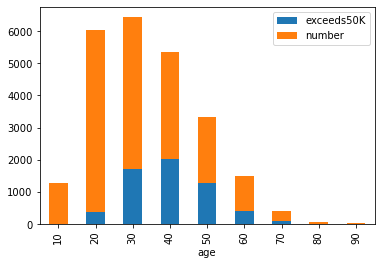

In [64]:
#我们可以看到没有什么不同，除了train中多了一列exceeds50K
#接下来我们分析age和最终结果的关系
def link_to_result(train,feature):
    result_column = 'exceeds50K'
    link_table = train[[feature,result_column]]
    link_table['number'] =1
    if feature == 'age':
        def assign_age(age):
            return(int(age/10)*10)
        link_table[feature] = link_table[feature].apply(assign_age)
    elif feature == 'hours-per-week':
        def assign_hours(h):
            if h >=0 and h < 40 :
                return '<40'
            elif h == 40:
                return '40'
            elif h >40 :
                return '>40'
        link_table[feature] = link_table[feature].apply(assign_hours)
    elif feature =='native-country':
        def assign_country(country):
            if country == ' United-States':
                return ' United-States'
            else: 
                return ' other_country'
        link_table[feature] = link_table[feature].apply(assign_country)
        
    result_totals = link_table.groupby(feature).sum()
    result_totals['number'] = result_totals['number']-result_totals['exceeds50K']
    my_plot = result_totals.plot(kind='bar',stacked=True)
    return my_plot
link_to_result(train,'age')

<ipython-input-56-ee369ac3ae76>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  link_table['number'] =1
<ipython-input-56-ee369ac3ae76>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  link_table[feature] = link_table[feature].apply(assign_hours)


<AxesSubplot:xlabel='hours-per-week'>

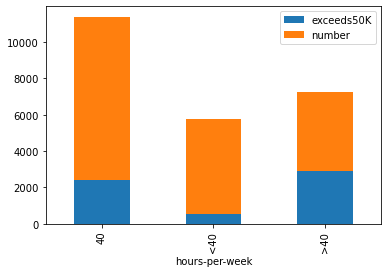

In [57]:
#接下来我们分析age和最终结果的关系
link_to_result(train,'hours-per-week')

<ipython-input-56-ee369ac3ae76>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  link_table['number'] =1


<AxesSubplot:xlabel='sex'>

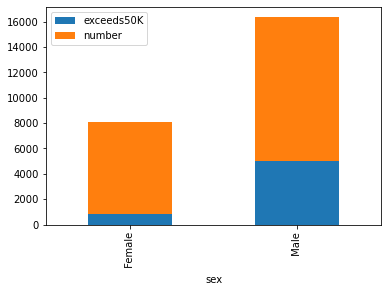

In [58]:
#接下来我们分析sex和最终结果的关系
link_to_result(train,'sex')

<ipython-input-56-ee369ac3ae76>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  link_table['number'] =1


<AxesSubplot:xlabel='occupation'>

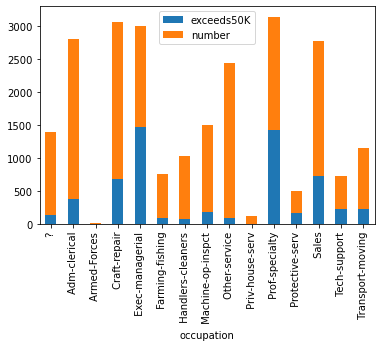

In [59]:
#接下来我们分析sex和最终结果的关系
link_to_result(train,'occupation')

<ipython-input-56-ee369ac3ae76>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  link_table['number'] =1


<AxesSubplot:xlabel='workclass'>

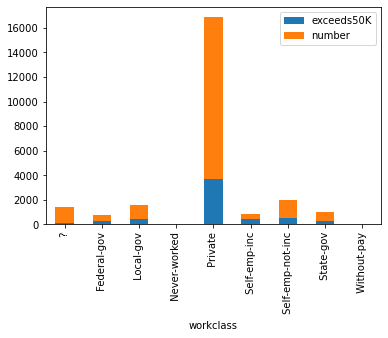

In [60]:
#接下来我们分析sex和最终结果的关系
link_to_result(train,'workclass')


<ipython-input-64-d671a668995a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  link_table['number'] =1
<ipython-input-64-d671a668995a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  link_table[feature] = link_table[feature].apply(assign_country)


<AxesSubplot:xlabel='native-country'>

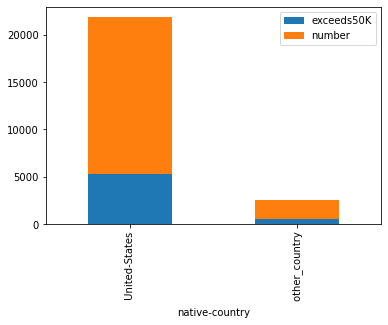

In [65]:
#接下来我们分析native-country和最终结果的关系
link_to_result(train,'native-country')

In [2]:
train=pd.read_csv('train.csv')
train=train.copy()
test=pd.read_csv('test.csv')
test=test.copy()
#找到每一个文字特征对应的编号
def find_feature_from_train_data(train_data):
    def assign_country(country):
        if country == ' United-States':
            return ' United-States'
        else: 
            return ' other_country'
    train_data['native-country'] = train_data['native-country'].apply(assign_country)
    train_data_clomn = {}
    for i in train_data:
        if train_data[i].dtypes == 'object':
            train_data_clomn[i] = {}
            if (train_data[i].unique() ==' ?').any():
                train_data_clomn[i][' ?'] =0
                n = 1
            else:
                n = 0
            for y in train_data[i].unique():
                if  y not in train_data_clomn[i]:
                    train_data_clomn[i][y] = n
                    n = n+1
    return train_data_clomn
train_feature_dict = find_feature_from_train_data(train)
train_feature_dict

{'workclass': {' ?': 0,
  ' Private': 1,
  ' State-gov': 2,
  ' Self-emp-inc': 3,
  ' Self-emp-not-inc': 4,
  ' Local-gov': 5,
  ' Federal-gov': 6,
  ' Without-pay': 7,
  ' Never-worked': 8},
 'education': {' Some-college': 0,
  ' Bachelors': 1,
  ' Assoc-voc': 2,
  ' HS-grad': 3,
  ' Assoc-acdm': 4,
  ' Masters': 5,
  ' 12th': 6,
  ' Doctorate': 7,
  ' 10th': 8,
  ' 9th': 9,
  ' Prof-school': 10,
  ' 5th-6th': 11,
  ' 11th': 12,
  ' 7th-8th': 13,
  ' 1st-4th': 14,
  ' Preschool': 15},
 'marital-status': {' Never-married': 0,
  ' Divorced': 1,
  ' Married-civ-spouse': 2,
  ' Widowed': 3,
  ' Separated': 4,
  ' Married-spouse-absent': 5,
  ' Married-AF-spouse': 6},
 'occupation': {' ?': 0,
  ' Prof-specialty': 1,
  ' Sales': 2,
  ' Protective-serv': 3,
  ' Craft-repair': 4,
  ' Farming-fishing': 5,
  ' Exec-managerial': 6,
  ' Other-service': 7,
  ' Adm-clerical': 8,
  ' Transport-moving': 9,
  ' Machine-op-inspct': 10,
  ' Tech-support': 11,
  ' Handlers-cleaners': 12,
  ' Priv-house-s

In [18]:
#由此可见，education-num为6以下的人数相对较少，我们可以对这这部分人做归一的量化
#因为我们后续要对test和traindata都做一样的操作因此我们需要构造一个函数，保证能实现一样的量化操作

def create_new_feature(train_data):
    #将原训练集里代表类别的特征虚拟化处理
    def feature_dummies(train,feature):
        dum=pd.get_dummies(train[feature],prefix=str(feature))
        train=pd.concat([train,dum],axis=1)
        del train[feature]
        return train
    #将国别划分为美国和其他国家
    def assign_country(country):
        if country == ' United-States':
            return ' United-States'
        else: 
            return ' other_country'
    train_data['native-country'] = train_data['native-country'].apply(assign_country)
    # 构造新特征
    # total_gain：
    def price_per_review(df):
        df['total_gain'] = (df["capital-gain"]) - (df["capital-loss"])

    price_per_review(train_data)
    # 标准化total_gain
    train_data['normalized_total_gain'] = (train_data['total_gain'] - train_data['total_gain'].mean()) / (train_data['total_gain'].std())
    del train_data['total_gain']
    # 构造新特征
    # gain_per_hour：单位bed的价格
    def gain_per_hour(df):
        df['gain_per_hour'] = ((df["capital-gain"]) - (df["capital-loss"])) / (df["hours-per-week"])

    gain_per_hour(train_data)
    # 标准化gain_per_hour
    train_data['normalized_gain_per_hour'] = (train_data['gain_per_hour'] - train_data['gain_per_hour'].mean()) / (train_data['gain_per_hour'].std())
    del train_data['gain_per_hour']
    # 标准化age
    def assign_age(age):
        return(int(age/10))
    train_data["age"] = train_data["age"].apply(assign_age)
    #将训练集里代表类别的特征‘age’虚拟化处理
    train_data = feature_dummies(train_data,'age')
    # 标准化hours-per-week
    def assign_hours(h):
        if h >=0 and h < 40 :
            return 1
        elif h == 40:
            return 2
        elif h >40 :
            return 3
    train_data["hours-per-week"] = train_data["hours-per-week"].apply(assign_hours)
    #将训练集里代表类别的特征‘hours-per-week’虚拟化处理
    train_data = feature_dummies(train_data,'hours-per-week')
    del train_data['capital-gain']
    del train_data['capital-loss']
    del train_data['education-num']
    #fnlwget中的不重复信息太多了，而且是个ID没什么意义，因此决定删除
    del train_data['fnlwgt']
    return train_data


def transform_dataset(train_data,train_data_clomn):
	def feature_coding(train_data,feature):
		dum = pd.get_dummies(train_data[feature], prefix=str(feature))
		train_data = pd.concat([train_data, dum], axis=1)
		del train_data[feature]
		return train_data
	train_data = create_new_feature(train_data)
	for i in train_data:
		if train_data[i].dtypes == 'object':
			for y in train_data_clomn[i]:
				train_data[i].replace(y,train_data_clomn[i][y],inplace=True)
			train_data = feature_coding(train_data, i)
	return train_data
train=pd.read_csv('train.csv')
train=train.copy()
test=pd.read_csv('test.csv')
test=test.copy()
transform_train = transform_dataset(train,train_feature_dict)
transform_test = transform_dataset(test,train_feature_dict)

In [19]:
#数据清洗完了，接下来我们要做数据挖掘了
#先使用逻辑回归，
import os
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
from numpy import nan as NaN

def load_data(processed_train,processed_test):
    feature = processed_train.columns.drop("exceeds50K")
    X_all = processed_train[feature]
    X_all = np.array(X_all.values)
    Y_all = processed_train["exceeds50K"]
    Y_all = np.array(Y_all.values)
    Y_all = Y_all.reshape((-1,1))
    X_test = processed_test
    X_test = np.array(X_test.values)
    return  (X_all, Y_all, X_test)
def normalization(X_all, X_test):
    """数据归一化处理"""
    X_train_test = np.concatenate((X_all, X_test), axis=0)
    mu = (sum(X_train_test) / X_train_test.shape[0])
    # std = sqrt(mean(abs(x - x.mean()) ** 2)).
    sigma = np.std(X_train_test, axis=0)

    # 目的就是使维度相同
    mu = np.tile(mu, (X_train_test.shape[0], 1))
    sigma = np.tile(sigma, (X_train_test.shape[0], 1))
    X_train_test_normed = (X_train_test - mu) / sigma

    # split to train, test
    X_all = X_train_test_normed[0:X_all.shape[0]]
    X_test = X_train_test_normed[X_all.shape[0]:]
    return X_all, X_test


def _shuffle(X, Y):
    '''将顺序打乱'''
    randomsize = np.arange(len(X))
    np.random.shuffle(randomsize)
    return (X[randomsize], Y[randomsize])


def split_valid_set(X_all, Y_all, percentage):
    '''分出数据作为验证数据'''
    all_data_size = len(X_all)
    valid_data_size = int(float(all_data_size*percentage))

    X_all, Y_all = _shuffle(X_all, Y_all)

    X_train, Y_train = X_all[0: valid_data_size], Y_all[0: valid_data_size]
    X_valid, Y_valid = X_all[valid_data_size:], Y_all[valid_data_size:]

    return X_train, Y_train, X_valid, Y_valid


def sigmoid(z):
    res = 1 / (1.0 + np.exp(-z))
    # 限制最小和最大值
    return np.clip(res, 1e-8, 1-(1e-8))


def valid(w, b, X_valid, Y_valid):
    valid_data_size = len(X_valid)

    z = (np.dot(X_valid, w) + b)
    y = sigmoid(z)
    y_ = np.around(y)
    result = (Y_valid == y_)
    print("Validation acc = %f" % (float(result.sum()) / valid_data_size))
    return



def train(X_train, Y_train, save_dir):
    '''训练模型'''
    # split a 10%-validation set from the training set
    valid_set_percentage = 0.3
    X_train, Y_train, X_valid, Y_valid = split_valid_set(X_train, Y_train, valid_set_percentage)

    # Initialize parameter, hyperparameter
    w = np.zeros((71,1))
    b = np.zeros((1,1))
    l_rate = 0.005
    batch_size = 16
    train_data_size = len(X_train)
    epoch_num = 700
    save_param_iter = 100
    step_num = int(float(train_data_size/batch_size))

    # starting training
    total_loss = 0.0
    for epoch in range(1, epoch_num):
        # do validation and parameter saving
        if (epoch) % save_param_iter == 0:
            print('====Saving Param at epoch %d====' % epoch)
            if not os.path.exists(save_dir):
                os.mkdir(save_dir)
            np.savetxt(os.path.join(save_dir, 'w'), w)
            np.savetxt(os.path.join(save_dir, 'b'), b)
            print('epoch avg loss = %f' % (total_loss / (float(save_param_iter)*train_data_size)))
            total_loss = 0.0

            valid(w, b, X_valid, Y_valid)

        # random shuffle
        X_train, Y_train = _shuffle(X_train, Y_train)

        # training with batch
        for idx in range(step_num):
            X = X_train[idx*batch_size: (idx+1)*batch_size]
            Y = Y_train[idx*batch_size: (idx+1)*batch_size]
            
            z = np.dot(X, w) + b
            y = sigmoid(z)
            
            cross_entropy = -1 * (np.dot(np.squeeze(Y), np.log(y)) + np.dot((1 - np.squeeze(Y)), np.log(1 - y)))
            # print cross_entropy.shape
            total_loss += cross_entropy.sum()
            w_grad = np.mean(-1*X*(Y-y), axis=0).reshape((71, 1))
            b_grad = np.mean(-1*(Y-y))
            #
            # SGD updating parameters
            w = w - l_rate*w_grad
            b = b - l_rate*b_grad
    return


def infer(X_test, save_dir):
    test_data_size = len(X_test)
    #
    #     # load parameters
    print("====loading param====")
    w = np.loadtxt(os.path.join(save_dir, 'w'))
    b = np.loadtxt(os.path.join(save_dir, 'b'))

    # predict
    z = (np.dot(X_test, w) + b)
    y = sigmoid(z)
    y_ = np.around(y)
    y_answer = y_.T

    # with open('answer', 'w') as f:
    #     f.write('id, label\n')
    #     for i, v in enumerate(y_):
    #         f.write("%d,%d\n" % (i+1, v))
    #     f.close()
    answer = DataFrame(y_answer)
    answer.index+=1
    answer.columns = ['prediction']
    answer = answer.astype('int64')
    answer.to_csv('answer.csv',index_label='id')


X_all, Y_all, X_test = load_data(transform_train,transform_test)
X_all, X_test = normalization(X_all, X_test)
train(X_all, Y_all, 'logistic_params/')
infer(X_test,'logistic_params/')




====Saving Param at epoch 100====
epoch avg loss = 0.315353
Validation acc = 0.846973
====Saving Param at epoch 200====
epoch avg loss = 0.309896
Validation acc = 0.847909
====Saving Param at epoch 300====
epoch avg loss = 0.309045
Validation acc = 0.847558
====Saving Param at epoch 400====
epoch avg loss = 0.308505
Validation acc = 0.847616
====Saving Param at epoch 500====
epoch avg loss = 0.308276
Validation acc = 0.846856
====Saving Param at epoch 600====
epoch avg loss = 0.308117
Validation acc = 0.846914
====loading param====


auc : 0.8142011741847042
accuracy : 0.7771180541337374
precision : 0.5209797229471994
recall : 0.8855144173349258


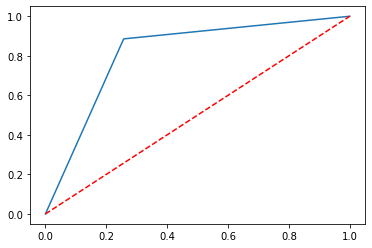

In [24]:
#使用决策树算法来训练训练集
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
train=transform_train

#设置惩罚因子，我们加重惩罚错误预测为1的
penalty = {
    0: 1,
    1: 3.6
}
features =train.columns.drop("exceeds50K")
#实例化模型对象；最大树深设为10；节点被分割之前的最小行数设为2，即是具有2行的节点将不会被分割，而是变成叶子
clf = DecisionTreeClassifier(class_weight=penalty,min_samples_split=2,max_depth=10)
clf.fit(train[features], train['exceeds50K'])

#使用5重交叉验证进行预测
fitted_labels=cross_val_predict(clf,train[features],train['exceeds50K'],cv=5)
train['fitted_labels']=fitted_labels
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
#计算auc
fpr,tpr,thresholds =roc_curve(train['exceeds50K'],train['fitted_labels'])
auc=auc(fpr,tpr)
print('auc : '+str(auc))

#以fpr假正率为横轴，tpr真征率为纵轴绘出auc曲线
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')

from sklearn.metrics import accuracy_score,precision_score,recall_score
#计算accuracy
accuracy = accuracy_score(train['exceeds50K'],train['fitted_labels'])
print('accuracy : '+str(accuracy))
#计算precision
precision =precision_score(train['exceeds50K'],train['fitted_labels'])
print('precision : '+str(precision))
#计算recall
recall=recall_score(train['exceeds50K'],train['fitted_labels'])
print('recall : '+str(recall))

auc : 0.8222336407668457
accuracy : 0.7940297285123459
precision : 0.5440008471883935
recall : 0.876471591878519


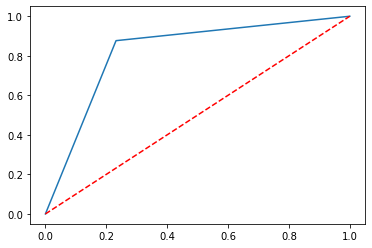

In [27]:
#使用随机森林算法来训练训练集
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

train=transform_train

#设置惩罚因子，我们加重惩罚错误预测为1的
penalty = {
    0: 1,
    1: 3.6
}

#实例化模型对象：最大树深设为11；节点被分割之前的最小行数设为2，即是具有2行的节点将不会被分割，而是变成叶子
rf =RandomForestClassifier(class_weight=penalty,min_samples_split=5,max_depth=11)
features =train.columns.drop("exceeds50K")
rf.fit(train[features],train['exceeds50K'])

#使用5重交叉验证进行预测
fitted_labels=cross_val_predict(rf,train[features],train['exceeds50K'],cv=5)
train['fitted_labels']=fitted_labels

from sklearn.metrics import roc_curve,auc
#计算auc
fpr,tpr,thresholds =roc_curve(train['exceeds50K'],train['fitted_labels'])
auc=auc(fpr,tpr)
print('auc : '+str(auc))

#以fpr假正率为横轴，tpr真征率为纵轴绘出auc曲线
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')

from sklearn.metrics import accuracy_score,precision_score,recall_score
#计算accuracy
accuracy = accuracy_score(train['exceeds50K'],train['fitted_labels'])
print('accuracy : '+str(accuracy))
#计算precision
precision =precision_score(train['exceeds50K'],train['fitted_labels'])
print('precision : '+str(precision))
#计算recall
recall=recall_score(train['exceeds50K'],train['fitted_labels'])
print('recall : '+str(recall))

In [ ]:
#使用神经网络来训练训练集
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict

train=transform_train

features =train.columns.drop('exceeds50K')

#实例化模型对象：隐藏层的数量是3，没层的神经元数量分别是2,6,10；
#使用激活参数指定所有层中的激活函数:logistic：sigmoid函数；tanh：双曲正切函数；relu:ReLU函数;identity：正比例函数
mlp=MLPClassifier(hidden_layer_sizes=(2,6,10),activation='logistic')
mlp.fit(train[features],train['exceeds50K'])

#使用5重交叉验证进行预测
fitted_labels=cross_val_predict(mlp,train[features],train['exceeds50K'],cv=4)
train['fitted_labels']=fitted_labels
#计算auc
fpr,tpr,thresholds =roc_curve(train['exceeds50K'],train['fitted_labels'])
auc=auc(fpr,tpr)
print('神经网络：')
print('auc : '+str(auc))

#以fpr假正率为横轴，tpr真征率为纵轴绘出auc曲线
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')

from sklearn.metrics import accuracy_score,precision_score,recall_score
#计算accuracy
accuracy = accuracy_score(train['exceeds50K'],train['fitted_labels'])
print('accuracy : '+str(accuracy))
#计算precision
precision =precision_score(train['exceeds50K'],train['fitted_labels'])
print('precision : '+str(precision))
#计算recall
recall=recall_score(train['exceeds50K'],train['fitted_labels'])
print('recall : '+str(recall))

支持向量机SVM：
auc : 0.8282995584856649
accuracy : 0.8026288849760452
precision : 0.5562885260084351
recall : 0.8776659273161577


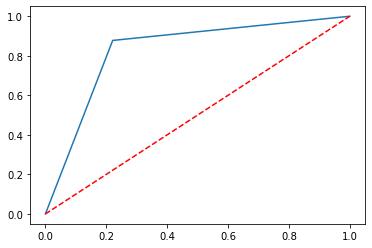

In [32]:
#使用支持向量机来训练模型
from sklearn import svm
from sklearn.model_selection import cross_val_predict

train=transform_train

#设置惩罚因子，我们加重惩罚错误预测为1的
penalty = {
    0: 1,
    1: 3.6
}

features =train.columns.drop('exceeds50K')

#实例化模型对象：
model = svm.SVC(class_weight=penalty) 
model.fit(train[features],train['exceeds50K'])

#使用5重交叉验证进行预测
fitted_labels=cross_val_predict(model,train[features],train['exceeds50K'],cv=5)
train['fitted_labels']=fitted_labels
from sklearn.metrics import roc_curve,auc
#计算auc
fpr,tpr,thresholds =roc_curve(train['exceeds50K'],train['fitted_labels'])
auc=auc(fpr,tpr)
print('支持向量机SVM：')
print('auc : '+str(auc))

#以fpr假正率为横轴，tpr真征率为纵轴绘出auc曲线
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')

from sklearn.metrics import accuracy_score,precision_score,recall_score
#计算accuracy
accuracy = accuracy_score(train['exceeds50K'],train['fitted_labels'])
print('accuracy : '+str(accuracy))
#计算precision
precision =precision_score(train['exceeds50K'],train['fitted_labels'])
print('precision : '+str(precision))
#计算recall
recall=recall_score(train['exceeds50K'],train['fitted_labels'])
print('recall : '+str(recall))